In [54]:
%pip install numpy scipy matplotlib ipympl
%matplotlib widget

Note: you may need to restart the kernel to use updated packages.


In [55]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

# Cargar el archivo WAV
fs, data = wavfile.read('mtms-arrC1A.wav')


#imprimir información del archivo
print(f'Tasa de muestreo: {fs} Hz')
print(f'Duración: {data.shape[0] / fs:.2f} segundos')
print(f'Número de canales: {data.shape[1] if data.ndim > 1 else 1}')

Tasa de muestreo: 16000 Hz
Duración: 33.97 segundos
Número de canales: 15


In [56]:
# Spectrogram
def plot_spectrogram(data, sample_rate, vmin=-20, vmax=10, NFFT=1024, noverlap=512):
    plt.figure(figsize=(10, 6))
    plt.specgram(data, Fs=sample_rate, NFFT=NFFT, noverlap=noverlap, cmap='plasma', sides='twosided', vmin=vmin, vmax=vmax)
    plt.title('Espectrograma de mtms-arrC1A.wav')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Frecuencia [Hz]')
    plt.colorbar(label='Intensidad [dB]')
    plt.show()

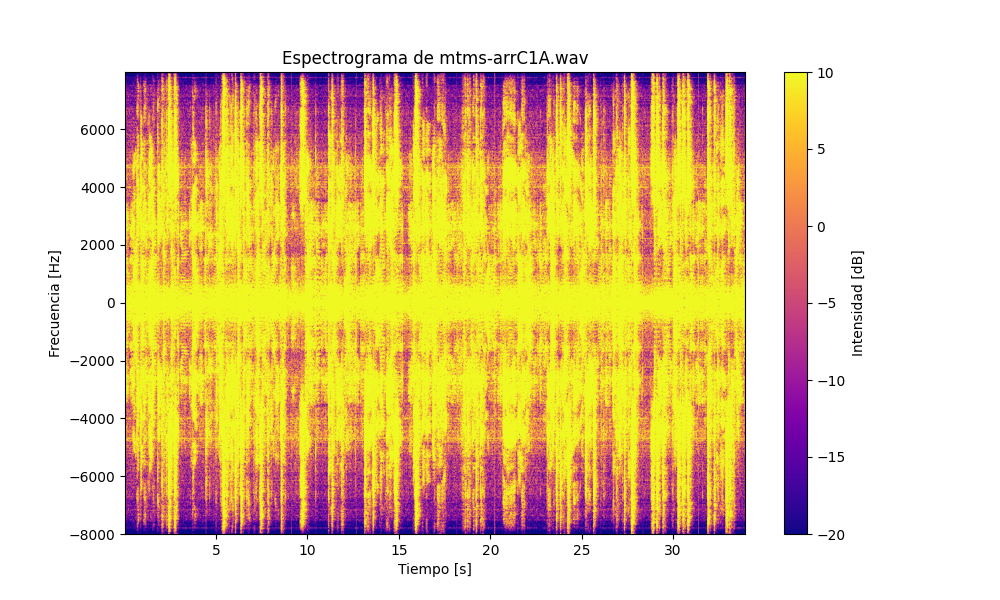

In [57]:
plot_spectrogram(data[:,0], fs)

C:\Users\jtori\AppData\Local\Temp\ipykernel_17732\1085433085.py:4: UserWarning: Only one segment is calculated since parameter NFFT (=1024) >= signal length (=15).
  plt.specgram(data, Fs=sample_rate, NFFT=NFFT, noverlap=noverlap, cmap='plasma', sides='twosided', vmin=vmin, vmax=vmax)


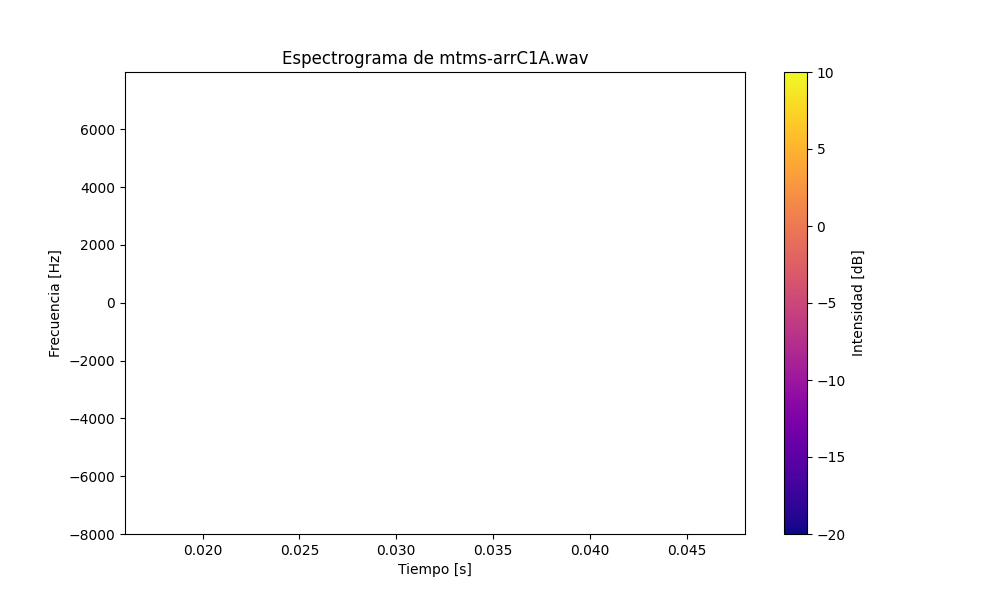

In [ ]:
# Modulate 2KHz -> 0Hz

time = np.linspace(0, data.shape[0]/fs, data.shape[0])
carrier_freq = 2000
modulated_signals = data * (np.exp(-2j * np.pi * carrier_freq * time))
plot_spectrogram(modulated_signals[0], fs)

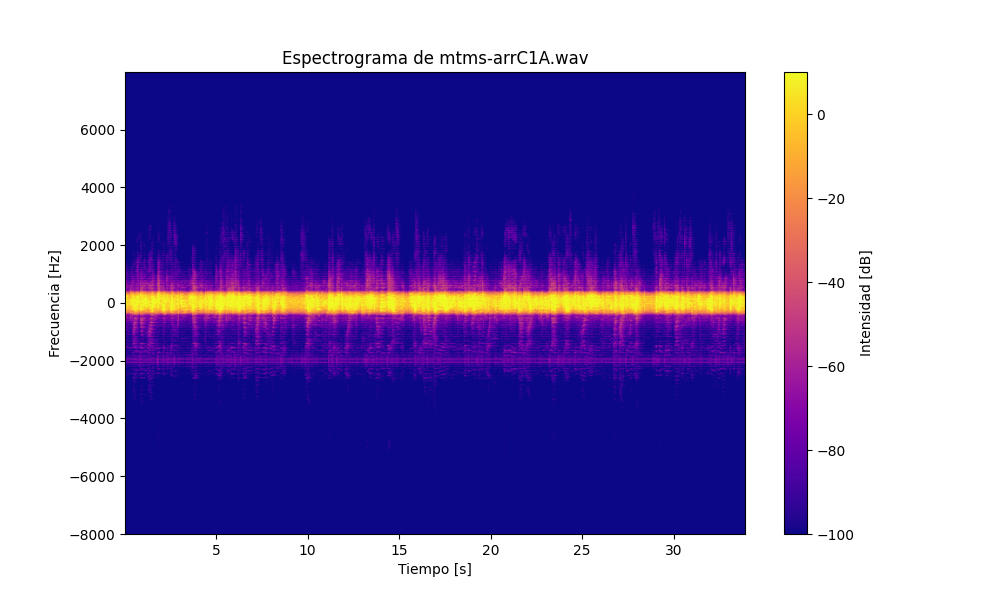

In [59]:
import scipy.signal as sp
# Apply low pass filter
h_c = sp.firwin(numtaps=201, cutoff=200, fs=fs, window='blackman')
filtered_signal = sp.lfilter(h_c, 1.0, modulated_signal)
plot_spectrogram(filtered_signal, fs, vmin=-100, vmax=10, NFFT=2048, noverlap=1024)
